In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic-passengers.csv',sep = ';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [3]:
print(df['Survived'].isna().sum() )
print(df['Age'].isna().sum() )
print(df['Sex'].isna().sum() )
print(df['Name'].isna().sum() )
print(df['Embarked'].isna().sum() )
print(df['Cabin'].isna().sum() )

0
177
0
0
2
687


In [4]:
df["Age"] = df["Age"].fillna(df["Age"].mean())
df.dropna(subset = ["Sex"], inplace=True)
df.dropna(subset = ["Cabin"], inplace=True)
df.dropna(subset = ["Embarked"], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,Yes,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S
863,858,Yes,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
865,196,Yes,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C
875,463,No,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S


In [5]:
print("Survived:",df['Survived'].isnull().sum() )
print("Age:",df['Age'].isna().sum() )
print("Sex:",df['Sex'].isna().sum() )
print("Name:",df['Name'].isnull().sum() )
print("Embarked:",df['Embarked'].isnull().sum() )
print("Cabin",df['Cabin'].isnull().sum() )

Survived: 0
Age: 0
Sex: 0
Name: 0
Embarked: 0
Cabin 0


<AxesSubplot:title={'center':'hisogram of ages'}, xlabel='Age', ylabel='Frequency'>

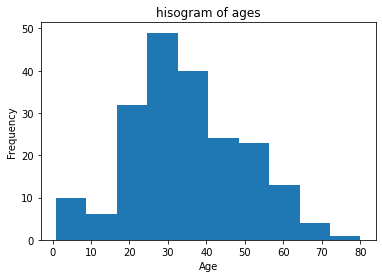

In [6]:
plt.title('hisogram of ages')
plt.xlabel('Age')
df['Age'].plot.hist()

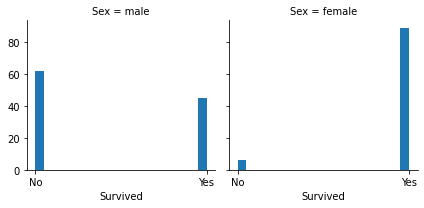

In [7]:
g = sns.FacetGrid(df,col='Sex')
g.map(plt.hist,'Survived',bins=20)

107
95


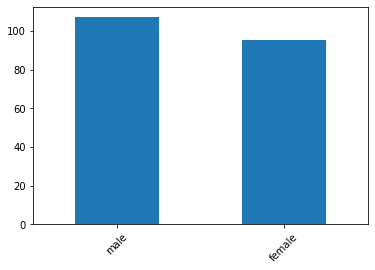

In [8]:
g = df['Sex'].value_counts()
g.plot.bar(rot=45)
nb_male = g.male
nb_female = g.female
print(nb_male)
print(nb_female)

In [9]:
df[["Sex","Survived","PassengerId"]].groupby(["Survived","Sex"]).count()

PassengerId
Survived Sex                
No       female            6
         male             62
Yes      female           89
         male             45

# male / survived = yes

In [10]:
df_male_survived_y = df.copy()
print(df_male_survived_y.shape)

(202, 12)


In [11]:
print(df_male_survived_y['Survived'].isnull().sum())
print(df_male_survived_y['Age'].isnull().sum())
print(df_male_survived_y['Sex'].isnull().sum())

0
0
0


In [12]:
df_male_survived_y.drop(df_male_survived_y[df_male_survived_y['Survived'] == "No"].index, inplace = True)
print(df_male_survived_y.shape)

(134, 12)


In [13]:
df_male_survived_y.drop(df_male_survived_y[df_male_survived_y['Sex'] == "female"].index, inplace = True)
print(df_male_survived_y.shape)

(45, 12)


In [14]:
df_male_survived_y

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.000000,1,0,19943,90.0000,C93,S
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.000000,1,1,13567,79.2000,B41,C
37,431,Yes,1,"Bjornstrom-Steffansson, Mr. Mauritz Hakan",male,28.000000,0,0,110564,26.5500,C52,S
110,210,Yes,1,"Blank, Mr. Henry",male,40.000000,0,0,112277,31.0000,A31,C
123,648,Yes,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.000000,0,0,13213,35.5000,A26,C
128,56,Yes,1,"Woolner, Mr. Hugh",male,29.699118,0,0,19947,35.5000,C52,S
177,708,Yes,1,"Calderhead, Mr. Edward Pennington",male,42.000000,0,0,PC 17476,26.2875,E24,S
189,461,Yes,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S
224,622,Yes,1,"Kimball, Mr. Edwin Nelson Jr",male,42.000000,1,0,11753,52.5542,D19,S
235,22,Yes,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,D56,S


<AxesSubplot:title={'center':'hisogram of males that survived with ages'}, xlabel='age', ylabel='Frequency'>

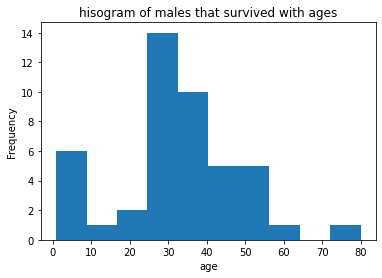

In [15]:
plt.title('hisogram of males that survived with ages')
plt.xlabel('age')
df_male_survived_y['Age'].plot.hist()

# male / survived = no

In [16]:
df_male_survived_n = df.copy()
print(df_male_survived_n.shape)

(202, 12)


In [17]:
df_male_survived_n.drop(df_male_survived_n[df_male_survived_n['Survived'] == "Yes"].index, inplace = True)
print(df_male_survived_n.shape)

(68, 12)


In [18]:
df_male_survived_n.drop(df_male_survived_n[df_male_survived_n['Sex'] == "female"].index, inplace = True)
print(df_male_survived_n.shape)

(62, 12)


In [19]:
df_male_survived_n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.000000,0,0,348123,7.6500,F G73,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.000000,1,0,F.C. 12750,52.0000,B71,S
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C82,C
32,528,No,1,"Farthing, Mr. John",male,29.699118,0,0,PC 17483,221.7792,C95,S
33,537,No,1,"Butt, Major. Archibald Willingham",male,45.000000,0,0,113050,26.5500,B38,S
...,...,...,...,...,...,...,...,...,...,...,...,...
839,337,No,1,"Pears, Mr. Thomas Clinton",male,29.000000,1,0,113776,66.6000,C2,S
855,264,No,1,"Harrison, Mr. William",male,40.000000,0,0,112059,0.0000,B94,S
861,868,No,1,"Roebling, Mr. Washington Augustus II",male,31.000000,0,0,PC 17590,50.4958,A24,S
875,463,No,1,"Gee, Mr. Arthur H",male,47.000000,0,0,111320,38.5000,E63,S


<AxesSubplot:title={'center':"hisogram of males that doesen't survived with ages"}, xlabel='age', ylabel='Frequency'>

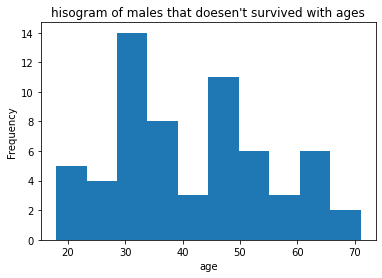

In [20]:
plt.title("hisogram of males that doesen't survived with ages")
plt.xlabel('age')
df_male_survived_n['Age'].plot.hist()

# females / survived = yes

In [21]:
df_female_survived_y = df.copy()
print(df_female_survived_y.shape)

(202, 12)


In [22]:
print(df_female_survived_y['Survived'].isnull().sum())
print(df_female_survived_y['Age'].isnull().sum())
print(df_female_survived_y['Sex'].isnull().sum())

0
0
0


In [23]:
df_female_survived_y.drop(df_female_survived_y[df_female_survived_y['Survived'] == "Yes"].index, inplace = True)
print(df_female_survived_y.shape)

(68, 12)


In [24]:
df_female_survived_y.drop(df_female_survived_y[df_female_survived_y['Sex'] == "male"].index, inplace = True)
print(df_female_survived_y.shape)

(6, 12)


In [25]:
df_female_survived_y.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
136,499,No,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
370,298,No,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
416,773,No,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5000,E77,S
813,252,No,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,29.0,1,1,347054,10.4625,G6,S
838,178,No,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
860,206,No,3,"Strom, Miss. Telma Matilda",female,2.0,0,1,347054,10.4625,G6,S


<AxesSubplot:title={'center':'hisogram of females that survived with ages'}, xlabel='age', ylabel='Frequency'>

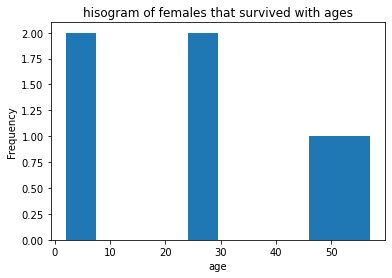

In [26]:
plt.title("hisogram of females that survived with ages")
plt.xlabel('age')
df_female_survived_y['Age'].plot.hist()

# females / survived = no

In [27]:
df_female_survived_n = df.copy()
print(df_female_survived_n.shape)

(202, 12)


In [28]:
print(df_female_survived_n['Survived'].isnull().sum())
print(df_female_survived_n['Age'].isnull().sum())
print(df_female_survived_n['Sex'].isnull().sum())

0
0
0


In [29]:
df_female_survived_n.drop(df_female_survived_n[df_female_survived_n['Survived'] == "No"].index, inplace = True)
print(df_female_survived_n.shape)

(134, 12)


In [30]:
df_female_survived_n.drop(df_female_survived_n[df_female_survived_n['Sex'] == "male"].index, inplace = True)
print(df_female_survived_n.shape)

(89, 12)


In [31]:
df_female_survived_n.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,152,Yes,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.000000,1,0,113776,66.6000,C2,S
63,718,Yes,2,"Troutt, Miss. Edwina Celia ""Winnie""",female,27.000000,0,0,34218,10.5000,E101,S
69,863,Yes,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.000000,0,0,17466,25.9292,D17,S
87,541,Yes,1,"Crosby, Miss. Harriet R",female,36.000000,0,2,WE/P 5735,71.0000,B22,S
91,780,Yes,1,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.000000,0,1,24160,211.3375,B3,S
92,717,Yes,1,"Endres, Miss. Caroline Louise",female,38.000000,0,0,PC 17757,227.5250,C45,C
98,32,Yes,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,B78,C
137,219,Yes,1,"Bazzani, Miss. Albina",female,32.000000,0,0,11813,76.2917,D15,C
139,311,Yes,1,"Hays, Miss. Margaret Bechstein",female,24.000000,0,0,11767,83.1583,C54,C
147,12,Yes,1,"Bonnell, Miss. Elizabeth",female,58.000000,0,0,113783,26.5500,C103,S


<AxesSubplot:title={'center':'hisogram of females that survived with ages'}, xlabel='age', ylabel='Frequency'>

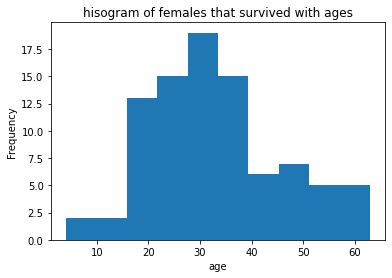

In [32]:
plt.title("hisogram of females that survived with ages")
plt.xlabel('age')
df_female_survived_n['Age'].plot.hist()

# Studing if the Pclass and Embarked affect the result

In [33]:
df_Pclass = df.copy()
print(df_Pclass.shape)

(202, 12)


In [34]:
df_Pclass.drop(df_Pclass[df_Pclass['Pclass'] == 2].index, inplace = True)
df_Pclass.drop(df_Pclass[df_Pclass['Pclass'] == 3].index, inplace = True)
df_Pclass.drop(df_Pclass[df_Pclass['Survived'] == "No"].index, inplace = True)
print(df_Pclass.shape)

(115, 12)


<AxesSubplot:title={'center':'Pclass = 1'}, xlabel='age', ylabel='Frequency'>

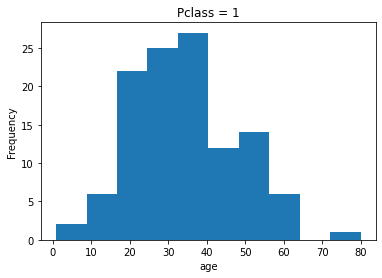

In [35]:
plt.title("Pclass = 1")
plt.xlabel('age')
df_Pclass['Age'].plot.hist()

In [36]:
df_Pclass2 = df.copy()
print(df_Pclass2.shape)

(202, 12)


In [37]:
df_Pclass2["Pclass"].dropna(axis=0,how="any",inplace=True)
df_Pclass2["Survived"].dropna(axis=0,how="any",inplace=True)

In [38]:
df_Pclass2.drop(df_Pclass2[df_Pclass2['Pclass'] == 1].index, inplace = True)
df_Pclass2.drop(df_Pclass2[df_Pclass2['Pclass'] == 3].index, inplace = True)
df_Pclass2.drop(df_Pclass2[df_Pclass2['Survived'] == "No"].index, inplace = True)
print(df_Pclass2.shape)

(13, 12)


<AxesSubplot:title={'center':'Pclass = 2'}, xlabel='age', ylabel='Frequency'>

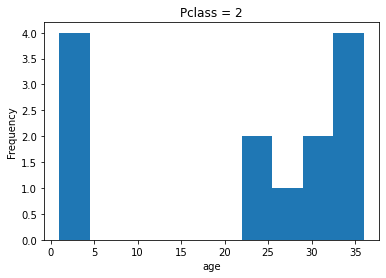

In [39]:
plt.title("Pclass = 2")
plt.xlabel('age')
df_Pclass2['Age'].plot.hist()

In [40]:
df_Pclass3 = df.copy()
print(df_Pclass3.shape)

(202, 12)


In [41]:
df_Pclass3["Pclass"].dropna(axis=0,how="any",inplace=True)
df_Pclass3["Survived"].dropna(axis=0,how="any",inplace=True)

In [42]:
df_Pclass3.drop(df_Pclass3[df_Pclass3['Pclass'] == 1].index, inplace = True)
df_Pclass3.drop(df_Pclass3[df_Pclass3['Pclass'] == 2].index, inplace = True)
df_Pclass3.drop(df_Pclass3[df_Pclass3['Survived'] == "No"].index, inplace = True)
print(df_Pclass3.shape)

(6, 12)


<AxesSubplot:title={'center':'Pclass = 3'}, xlabel='age', ylabel='Frequency'>

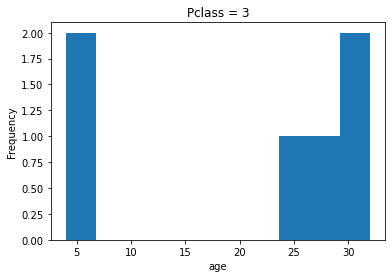

In [43]:
plt.title("Pclass = 3")
plt.xlabel('age')
df_Pclass3['Age'].plot.hist()

In [44]:
print(df_Pclass.shape[0])
print(df_Pclass2.shape[0])
print(df_Pclass3.shape[0])

115
13
6


-------------------------------------------------------

In [45]:
df_emb = df.copy()
print(df_emb.shape)

(202, 12)


In [46]:
df_emb["Embarked"].dropna(axis=0,how="any",inplace=True)
df_emb["Survived"].dropna(axis=0,how="any",inplace=True)

In [47]:
df_emb.drop(df_emb[df_emb['Embarked'] == "C"].index, inplace = True)
df_emb.drop(df_emb[df_emb['Embarked'] == "S"].index, inplace = True)
df_emb.drop(df_emb[df_emb['Survived'] == "No"].index, inplace = True)
print(df_emb.shape)

(2, 12)


<AxesSubplot:title={'center':'Q'}, xlabel='age', ylabel='Frequency'>

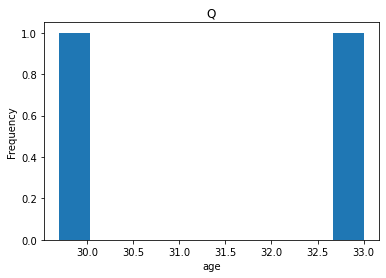

In [48]:
plt.title("Q")
plt.xlabel('age')
df_emb['Age'].plot.hist()

In [49]:
df_emb2 = df.copy()
print(df_emb2.shape)

(202, 12)


In [50]:
df_emb2["Embarked"].dropna(axis=0,how="any",inplace=True)
df_emb2["Survived"].dropna(axis=0,how="any",inplace=True)

In [51]:
df_emb2.drop(df_emb2[df_emb2['Embarked'] == "Q"].index, inplace = True)
df_emb2.drop(df_emb2[df_emb2['Embarked'] == "S"].index, inplace = True)
df_emb2.drop(df_emb2[df_emb2['Survived'] == "No"].index, inplace = True)
print(df_emb2.shape)

(52, 12)


<AxesSubplot:title={'center':'C'}, xlabel='age', ylabel='Frequency'>

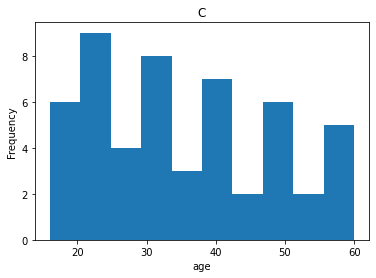

In [52]:
plt.title("C")
plt.xlabel('age')
df_emb2['Age'].plot.hist()

In [53]:
df_emb3 = df.copy()
print(df_emb3.shape)

(202, 12)


In [54]:
df_emb3["Embarked"].dropna(axis=0,how="any",inplace=True)
df_emb3["Survived"].dropna(axis=0,how="any",inplace=True)

In [55]:
df_emb3.drop(df_emb3[df_emb3['Embarked'] == "Q"].index, inplace = True)
df_emb3.drop(df_emb3[df_emb3['Embarked'] == "C"].index, inplace = True)
df_emb3.drop(df_emb3[df_emb3['Survived'] == "No"].index, inplace = True)
print(df_emb3.shape)

(80, 12)


<AxesSubplot:title={'center':'S'}, xlabel='age', ylabel='Frequency'>

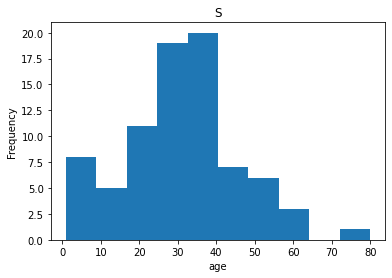

In [56]:
plt.title("S")
plt.xlabel('age')
df_emb3['Age'].plot.hist()

In [57]:
print(df_emb.shape[0])
print(df_emb2.shape[0])
print(df_emb3.shape[0])

2
52
80


In [58]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

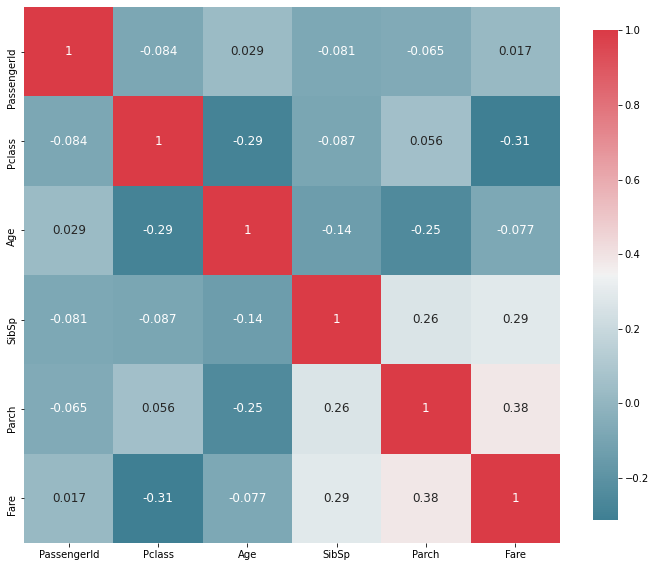

In [59]:
plot_correlation_map( df )

In [60]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer" ,

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

}

In [66]:
print(df['Name'][4])

def getindex(txt,i):
    for j in range(len(txt)):
        if txt[j] == i:
            return j
    return -1

def clean(txt):
    newtxt =''
    for i in range(len(txt)):
        if txt[i] != " ":
            newtxt += txt[i]
    return newtxt
T = []
for i in (df['Name']):
    start = getindex(i,',')
    end = getindex(i,'.')
    txt = i[start+1:end]
    txt = clean(txt)
    T.append(txt)
print(T)

Davidson, Mr. Thornton
['Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Major', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Col', 'Mr', 'Mrs', 'Miss', 'Mr', 'Miss', 'Miss', 'Miss', 'Miss', 'Dr', 'Mr', 'Mr', 'Mr', 'Miss', 'Miss', 'Mr', 'Miss', 'Mr', 'Mlle', 'Mr', 'Miss', 'Mr', 'Mr', 'Dr', 'Mr', 'Miss', 'Miss', 'Mrs', 'Miss', 'Mr', 'Mrs', 'Master', 'Mrs', 'Mrs', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Master', 'Mrs', 'Miss', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Lady', 'Mrs', 'Mr', 'Mrs', 'Mr', 'Mr', 'Master', 'Mrs', 'Mr', 'Mrs', 'Mlle', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Miss', 'Miss', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mme', 'Miss', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr', 'Mr', 'Mrs', 'Miss', 'Mr', 'Sir', 'Mr', 'Mrs', 'Mr', 'Capt', 'Mrs',

In [75]:


T2 =[]
print(len(T))
for i in range(len(T)):
    for k, v in Title_Dictionary.items():
        if T[i] == k :
            T2.append(v)
print(len(T),"/",len(T2))
T2.append('Mrs')


202
202 / 201


In [68]:
print(df['Name'].shape)


(202,)


In [72]:
df["Title"] = T2

In [73]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs
16,378,No,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C,Mrs
19,225,Yes,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S,Mrs
26,588,Yes,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,Yes,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S,Mrs
863,858,Yes,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S,Miss
865,196,Yes,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,Mrs
875,463,No,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S,Mrs


In [74]:
df.drop(['Name'], axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
1,76,No,3,male,25.0,0,0,348123,7.6500,F G73,S,Mrs
4,672,No,1,male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mrs
16,378,No,1,male,27.0,0,2,113503,211.5000,C82,C,Mrs
19,225,Yes,1,male,38.0,1,0,19943,90.0000,C93,S,Mrs
26,588,Yes,1,male,60.0,1,1,13567,79.2000,B41,C,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...
862,619,Yes,2,female,4.0,2,1,230136,39.0000,F4,S,Mrs
863,858,Yes,1,male,51.0,0,0,113055,26.5500,E17,S,Miss
865,196,Yes,1,female,58.0,0,0,PC 17569,146.5208,B80,C,Mrs
875,463,No,1,male,47.0,0,0,111320,38.5000,E63,S,Mrs
